In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('energydata_complete.csv', sep=',')

data = data.drop(columns=['date'])
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
data_sampled = data.sample(frac=0.2, random_state=42) 

X = data_sampled.drop(columns=['Appliances'])  
y = data_sampled['Appliances']                

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

grid_rf = GridSearchCV(estimator=rf_modelo, param_grid=parametros_rf, cv=2, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

parametros_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20],         
    'min_samples_split': [2, 5]    
}

rf_modelo = RandomForestRegressor(random_state=42)

In [8]:
parametros_svr = {
    'kernel': ['rbf'], 
    'C': [1, 10], 
    'gamma': ['scale']
}

svr_modelo = SVR()

grid_svr = GridSearchCV(estimator=svr_modelo, param_grid=parametros_svr, cv=2, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, y_train)

rf_pred = grid_rf.predict(X_test)
svr_pred = grid_svr.predict(X_test)

ensemble_pred = (rf_pred + svr_pred) / 2

In [6]:
def evaluar_modelo(y_real, y_predicho):
    mae = mean_absolute_error(y_real, y_predicho)
    mse = mean_squared_error(y_real, y_predicho)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_predicho)
    return mae, mse, rmse, r2

rf_mae, rf_mse, rf_rmse, rf_r2 = evaluar_modelo(y_test, rf_pred)
svr_mae, svr_mse, svr_rmse, svr_r2 = evaluar_modelo(y_test, svr_pred)
ensemble_mae, ensemble_mse, ensemble_rmse, ensemble_r2 = evaluar_modelo(y_test, ensemble_pred)

resultados_ensemble = {
    "Model": ["Random Forest", "Support Vector Regressor", "Ensemble"],
    "R2 Square": [rf_r2, svr_r2, ensemble_r2],
    "MAE": [rf_mae, svr_mae, ensemble_mae],
    "MSE": [rf_mse, svr_mse, ensemble_mse],
    "RMSE": [rf_rmse, svr_rmse, ensemble_rmse]
}

results_df = pd.DataFrame(resultados_ensemble)

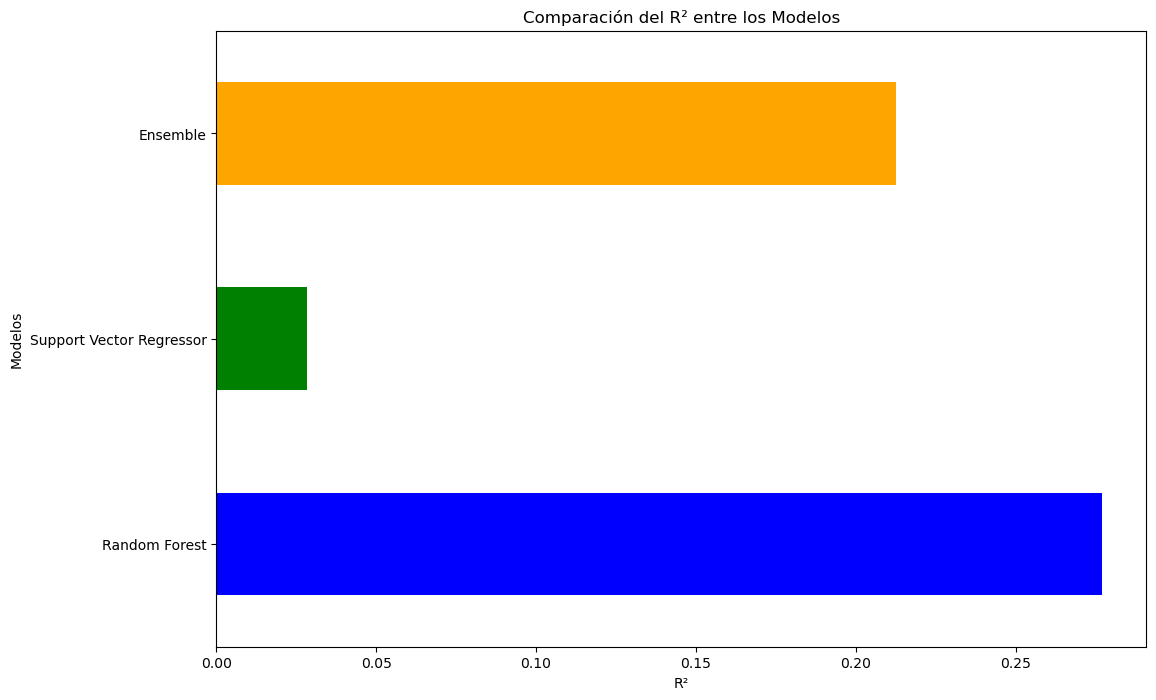

                          R2 Square        MAE           MSE        RMSE
Model                                                                   
Random Forest              0.276934  47.558293   7709.722058   87.805023
Support Vector Regressor   0.028215  44.746752  10361.698715  101.792430
Ensemble                   0.212521  44.120931   8396.533326   91.632600


In [7]:
results_df.set_index('Model', inplace=True)

results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color=['blue', 'green', 'orange'])
plt.title('Comparación del R² entre los Modelos')
plt.xlabel('R²')
plt.ylabel('Modelos')
plt.show()

print(results_df)
